         Date  River Flow  Rainfall  Flood
0  2020-01-01        1000        10      0
1  2020-01-02        1200        20      0
2  2020-01-03        1500        50      1
3  2020-01-04        1100        30      0
4  2020-01-05        1800        70      1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]


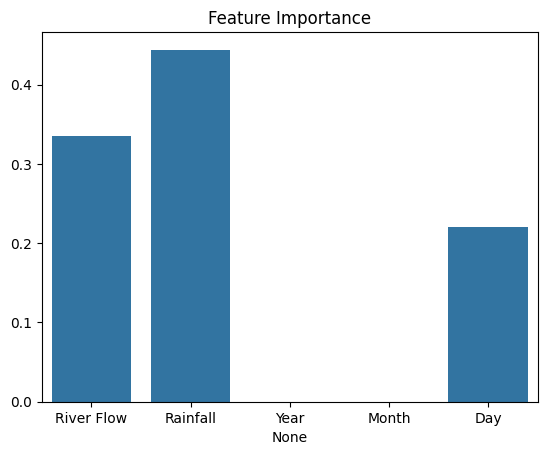

In [5]:
# FloodDetection.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the dataset from a local file
# Replace 'flood_data.csv' with the path to your actual dataset file
data = pd.read_csv('../datasets/flood_data.csv')

# Check the first few rows of the dataset to ensure it's loaded properly
print(data.head())

# Preprocessing the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format
data.set_index('Date', inplace=True)  # Set 'Date' as the index

# Feature Engineering
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

# Define features (X) and target (y)
X = data[['River Flow', 'Rainfall', 'Year', 'Month', 'Day']]  # Independent features
y = data['Flood']  # Dependent variable (target)

# Split the data into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Save the trained model for later use
joblib.dump(model, '../backend/models/flood_model.pkl')

# Plot feature importance to understand the most important features in flood prediction
feature_importances = model.feature_importances_
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance')
plt.show()
